<a href="https://colab.research.google.com/github/Wipada6430205202/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

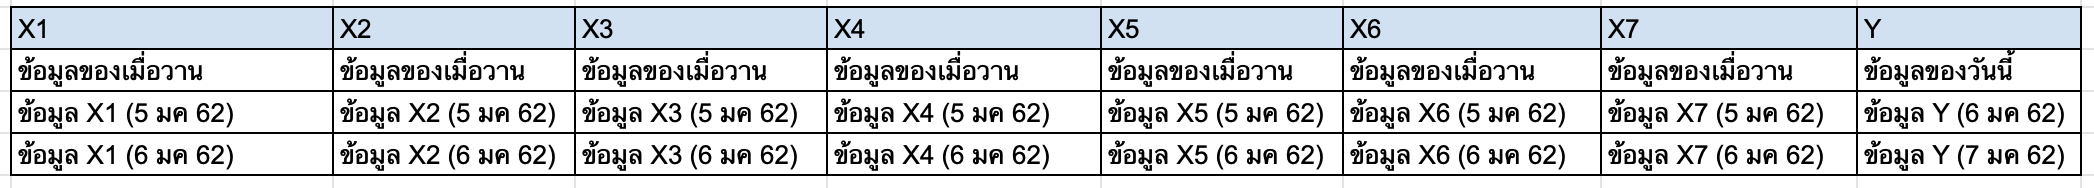

#นำข้อมูลเข้า


In [135]:
import pandas as pd
import os
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
os.chdir('/content/drive/MyDrive/BSC_DPDM23/อุตุ')
!pwd

/content/drive/.shortcut-targets-by-id/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4/อุตุ


In [19]:
!ls

'ความกด(เปอร์เซ็นต์)'	 'ความเร็วลม(นอต)'   'ปริมาณฝน(มิลลิเมตร)'	     'อุณหภูมิต่ำสุด(เซลเซียส)'
'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'  'จำนวนเมฆ(10ส่วน)'  'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'  'อุณหภูมิตุ้มแห้ง(เซลเซียส)'


#เตรียมข้อมูล

จากโฟลเดอร์อุตุนิยมวิทยา

ความกดอากาศ (%) = pressure

ความชื้นสัมพัทธ์ (%) = humidity

ความเร็วลม (นอต) = wind

 จำนวนเมฆ (10 ส่วน) = clouds

 ปริมาณฝน (มิลิเมตร) = rainfall

 อุณหภูมิจุดน้ำค้าง (เซลเซียส) = dewpoint

อุณหภูมิตุ้มแห้ง (เซลเซียส) = drybulb

= อุณหภูมิต่ำสุด (เซลเซียส) = minimum degree


จังหวัด

1. ขอนแก่น (Khon Kaen) = KKC

2. นครพนม (Nakhon Phanom) = NKP

3. สกลนคร (Sakon Nakhon) = SKN

4. หนองคาย (Nong Khai) = NKH

5. เลย (Loei) = LEI

##Pressure (%)


In [112]:
kkc_pressure = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
kkc_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [53]:
nkp_pressure = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
nkp_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [55]:
skn_pressure = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
skn_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


In [56]:
nkh_pressure = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
nkh_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [57]:
lei_pressure = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)
lei_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


###เปลี่ยนชื่อ column

In [51]:
column_name_pressure = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'เฉลี่ย'}
column_name_pressure

{'Unnamed: 0': 'ที่',
 'Unnamed: 1': 'สถานี',
 'Unnamed: 2': 'ปี-เดือน-วัน',
 'Unnamed: 34': 'เฉลี่ย'}

In [52]:
kkc_pressure = kkc_pressure.rename(columns=column_name_pressure)
kkc_pressure

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


In [54]:
nkp_pressure = nkp_pressure.rename(columns=column_name_pressure)
nkp_pressure

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.86,1011.24,1008.82,1007.46,1008.65,1010.53,1010.41,...,1011.63,1010.67,1010.17,1009.78,1008.53,1008.22,1008.94,1009.54,1012.76,1010.840323
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.26,1011.77,1010.84,1010.77,1011.02,1011.49,1010.06,...,1008.87,1010.93,1011.45,1011.22,1011.43,1010.70,1010.66,1009.89,-,1010.984000
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.12,1010.89,1011.93,1011.30,1012.01,1013.16,1012.68,...,1016.81,1017.31,1014.43,1012.45,1011.32,1010.47,1010.69,1014.48,1016.22,1012.551935
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.52,1014.01,1015.36,1014.22,1012.47,1013.17,1013.46,...,1014.11,1013.65,1013.57,1013.25,1015.31,1016.70,1015.92,1015.57,1016.14,1014.798710
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.63,1014.87,1014.45,1014.43,1013.88,1011.52,1008.45,...,1017.17,1014.55,1012.39,1011.08,1008.62,1007.56,-,-,-,1012.171429


In [58]:
skn_pressure = skn_pressure.rename(columns=column_name_pressure)
skn_pressure

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.87,1011.39,1008.88,1007.37,1008.45,1010.70,1010.49,...,1011.86,1010.66,1010.31,1009.83,1008.81,1008.29,1008.93,1009.38,1012.62,1010.898710
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.30,1011.97,1010.91,1010.93,1011.18,1011.66,1010.08,...,1008.84,1011.12,1011.66,1011.47,1011.38,1010.89,1010.67,1009.88,-,1011.054333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.19,1010.80,1011.88,1011.57,1011.81,1013.40,1012.71,...,1016.55,1017.46,1014.48,1012.58,1011.33,1010.65,1010.82,1014.19,1016.29,1012.625806
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.64,1014.29,1015.26,1014.42,1012.56,1013.52,1013.53,...,1014.27,1013.68,1013.54,1013.54,1015.37,1017.02,1015.94,1015.75,1016.68,1014.938387
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.79,1015.14,1014.60,1014.74,1014.09,1011.73,1008.51,...,1017.21,1014.62,1012.56,1011.07,1008.70,1007.22,-,-,-,1012.235000


In [59]:
nkh_pressure = nkh_pressure.rename(columns=column_name_pressure)
nkh_pressure

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.66,1011.44,1008.66,1006.94,1008.62,1011.05,1010.61,...,1011.80,1010.75,1010.30,1009.82,1009.26,1008.40,1008.97,1008.89,1012.23,1010.823871
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.25,1011.65,1010.88,1010.79,1010.84,1011.38,1009.94,...,1009.16,1010.86,1011.62,1011.53,1011.11,1010.83,1010.74,1010.1,-,1010.951667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.04,1010.28,1011.34,1011.40,1011.31,1013.40,1012.42,...,1015.72,1017.22,1014.72,1012.86,1011.53,1010.58,1010.92,1012.66,1015.72,1012.494516
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.38,1014.02,1014.56,1014.07,1012.31,1012.87,1013.07,...,1013.98,1013.14,1012.74,1013.02,1015.21,1016.80,1015.97,1015.36,1017.11,1014.523871
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1016.12,1015.23,1014.67,1014.85,1014.34,1011.44,1008.49,...,1016.37,1014.56,1012.50,1010.69,1008.41,1006.75,-,-,-,1011.956786


In [60]:
lei_pressure = lei_pressure.rename(columns=column_name_pressure)
lei_pressure

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.41,1010.77,1008.72,1007.10,1008.28,1010.43,1010.47,...,1011.23,1010.45,1009.91,1009.48,1008.96,1008.94,1008.57,1008.67,1011.74,1010.511613
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.46,1011.06,1010.41,1010.43,1010.33,1010.79,1009.67,...,1008.87,1010.62,1011.06,1010.99,1010.52,1010.43,1010.11,1009.83,-,1010.542667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.81,1010.25,1011.09,1010.69,1010.66,1011.99,1011.76,...,1014.52,1016.15,1013.87,1012.48,1011.23,1010.29,1010.23,1011.63,1014.75,1011.970645
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.63,1013.32,1013.99,1012.97,1011.70,1012.76,1012.56,...,1013.02,1012.71,1012.15,1011.74,1014.16,1015.69,1014.81,1014.81,1016.39,1013.735484
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.68,1014.51,1013.94,1013.86,1013.70,1011.59,1008.45,...,1015.19,1013.89,1012.02,1010.21,1008.33,1006.60,-,-,-,1011.348571


###ตรวจสอบ missing

In [113]:
print(kkc_pressure.isnull().any())
kkc_pressure.head()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29             False
30             False
31             False
Unnamed: 34    False
dtype: bool


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [62]:
print(nkp_pressure.isnull().any())
nkp_pressure.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [63]:
print(skn_pressure.isnull().any())
skn_pressure.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


In [64]:
print(nkh_pressure.isnull().any())
nkh_pressure.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [65]:
print(lei_pressure.isnull().any())
lei_pressure.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


data ไม่มีค่า missing


## humidity(%)

In [86]:
kkc_humidity = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
kkc_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [72]:
nkp_humidity = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
nkp_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


In [73]:
skn_humidity = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
skn_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


In [74]:
nkh_humidity = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
nkh_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


In [75]:
lei_humidity = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)
lei_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


###เปลี่ยนชื่อ column

In [76]:
column_name_humidity = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'เฉลี่ย'}
column_name_humidity

{'Unnamed: 0': 'ที่',
 'Unnamed: 1': 'สถานี',
 'Unnamed: 2': 'ปี-เดือน-วัน',
 'Unnamed: 34': 'เฉลี่ย'}

In [77]:
kkc_humidity = kkc_humidity.rename(columns=column_name_humidity)
nkp_humidity = nkp_humidity.rename(columns=column_name_humidity)
skn_humidity = skn_humidity.rename(columns=column_name_humidity)
nkh_humidity = nkh_humidity.rename(columns=column_name_humidity)
lei_humidity = lei_humidity.rename(columns=column_name_humidity)


In [79]:
kkc_humidity


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,73,73,72,81,83,73,70,...,65,68,69,69,62,64,69,74,68,72
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,64,67,67,66,65,65,67,...,63,75,82,75,73,73,75,74,-,68
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,68,66,69,71,69,63,67,...,59,56,60,59,58,61,57,55,54,62
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,62,58,59,60,62,61,62,...,59,59,59,67,71,91,78,71,72,63
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,69,66,62,58,59,53,50,...,50,52,56,53,51,54,-,-,-,55


In [80]:
nkp_humidity


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65
5,3,357201-นครพนม จ.นครพนม,2012-10-01,68,72,74,79,81,66,72,...,69,69,64,66,67,73,75,76,66,70
6,4,357201-นครพนม จ.นครพนม,2012-11-01,67,69,71,70,69,67,68,...,66,76,80,74,63,69,82,78,-,70
7,5,357201-นครพนม จ.นครพนม,2012-12-01,76,73,70,70,70,61,68,...,54,61,65,64,67,68,62,54,56,67
8,6,357201-นครพนม จ.นครพนม,2013-01-01,62,67,64,69,69,60,67,...,59,64,61,72,66,82,70,64,71,65
9,7,357201-นครพนม จ.นครพนม,2013-02-01,72,62,71,69,64,63,61,...,58,60,62,60,59,62,-,-,-,61


In [81]:
skn_humidity


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,65,73,73,82,80,69,71,...,70,67,67,70,67,65,72,75,66,70
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,63,67,70,69,67,66,67,...,65,72,75,72,65,70,84,78,-,69
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,75,72,68,71,71,67,68,...,61,62,64,65,67,69,65,62,60,67
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,65,67,64,68,67,65,66,...,61,63,64,73,73,82,72,67,72,66
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,72,65,69,69,65,56,56,...,57,59,61,58,57,57,-,-,-,60


In [83]:
nkh_humidity

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,69,70,74,81,84,79,68,...,69,70,70,70,69,67,69,72,60,72
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,63,68,69,70,67,69,68,...,70,74,79,77,76,72,84,76,-,71
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,76,74,71,73,75,66,73,...,61,62,63,68,69,71,69,63,59,69
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,67,68,66,68,69,68,67,...,67,64,66,67,86,83,76,68,88,68
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,81,77,74,69,67,65,57,...,53,57,61,59,60,65,-,-,-,64


In [82]:
lei_humidity

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,87,84,92,91,90,91,88,...,80,81,81,80,80,76,79,80,75,84
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,72,80,80,84,82,83,78,...,82,89,87,87,85,86,88,84,-,82
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,84,83,88,87,85,76,82,...,75,70,78,81,77,79,81,73,67,80
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,78,77,75,74,77,77,77,...,72,75,79,76,88,86,82,78,92,76
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,85,83,79,72,73,72,66,...,59,63,67,64,66,71,-,-,-,69


###ตรวจสอบ missing




In [84]:
print(kkc_humidity.isnull().any())
kkc_humidity.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [87]:
print(nkp_humidity.isnull().any())
nkp_humidity.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


In [88]:
print(skn_humidity.isnull().any())
skn_humidity.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


In [89]:
print(nkh_humidity.isnull().any())
nkh_humidity.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


In [90]:
print(lei_humidity.isnull().any())
lei_humidity.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


##wind

In [99]:
kkc_wind= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header = 4)
kkc_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [101]:
nkp_wind = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header = 4)
nkp_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [102]:
skn_wind = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header = 4)
skn_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [103]:
nkh_wind = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header = 4)
nkh_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [104]:
lei_wind = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header = 4)
lei_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


###เปลี่ยนชื่อ column

In [105]:
column_name_wind = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'เฉลี่ย'}
column_name_wind

{'Unnamed: 0': 'ที่',
 'Unnamed: 1': 'สถานี',
 'Unnamed: 2': 'ปี-เดือน-วัน',
 'Unnamed: 34': 'เฉลี่ย'}

In [106]:
kkc_wind= kkc_wind.rename(columns=column_name_wind)
nkp_wind = nkp_wind.rename(columns=column_name_wind)
skn_wind = skn_wind.rename(columns=column_name_wind)
nkh_wind = nkh_wind.rename(columns=column_name_wind)
lei_wind = lei_wind.rename(columns=column_name_wind)

In [107]:
kkc_wind

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


In [108]:
nkp_wind

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,2,2,2,2,2,...,3,1,2,2,2,1,1,1,3,1.774194
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,2,2,2,0,...,2,1,1,1,3,1,2,1,-,1.571429
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,2,3,1,2,4,3,...,5,3,2,2,3,3,3,5,4,2.193548
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2,1,2,2,...,2,0,3,2,3,0,1,1,2,1.900000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [109]:
skn_wind

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,2,2,1,5,3,2,...,3,2,1,2,1,1,2,3,4,1.967742
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,3,3,1,1,...,2,3,2,2,4,4,2,2,-,2.266667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,1,3,2,2,3,2,...,5,3,3,1,2,2,2,5,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2,1,2,2,...,2,0,3,2,3,0,1,1,2,1.900000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [110]:
nkh_wind

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,2,2,1,5,3,2,...,3,2,1,2,1,1,2,3,4,1.967742
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,3,3,1,1,...,2,3,2,2,4,4,2,2,-,2.266667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,1,3,2,2,3,2,...,5,3,3,1,2,2,2,5,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,2,1,2,2,...,2,2,2,4,3,3,1,2,2,2.387097
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [111]:
lei_wind

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,1,3,3,3,2,...,2,2,2,2,2,3,2,2,1,1.838710
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,1,2,2,2,2,...,2,2,1,2,1,2,3,2,-,1.833333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,4,3,2,2,4,1,...,3,3,2,1,2,2,2,3,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,1,1,2,2,1,2,1,...,1,2,2,2,3,3,1,2,2,2.032258
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,1,1,3,1,1,2,...,4,3,1,2,1,2,3,3,-,2.133333


###ตรวจสอบ missing


In [114]:
print(kkc_wind.isnull().any())
kkc_wind.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [115]:
print(nkp_wind.isnull().any())
nkp_wind.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [116]:
print(skn_wind.isnull().any())
skn_wind.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [117]:
print(nkh_wind.isnull().any())
nkh_wind.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [118]:
print(lei_wind.isnull().any())
lei_wind.head()

ที่             False
สถานี           False
ปี-เดือน-วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


##clouds

In [138]:
kkc_clouds= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header = 4)
kkc_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


In [122]:
nkp_clouds= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header = 4)
nkp_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


In [123]:
skn_clouds= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header = 4)
skn_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857


In [124]:
nkh_clouds= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header = 4)
nkh_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571


In [125]:
lei_clouds= pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header = 4)
lei_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###เปลี่ยนชื่อ column

In [126]:
column_name_clouds = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี-เดือน-วัน','Unnamed: 34':'เฉลี่ย'}
column_name_clouds

{'Unnamed: 0': 'ที่',
 'Unnamed: 1': 'สถานี',
 'Unnamed: 2': 'ปี-เดือน-วัน',
 'Unnamed: 34': 'เฉลี่ย'}

In [127]:
kkc_clouds= kkc_clouds.rename(columns=column_name_clouds)
nkp_clouds = nkp_clouds.rename(columns=column_name_clouds)
skn_clouds = skn_clouds.rename(columns=column_name_clouds)
nkh_clouds = nkh_clouds.rename(columns=column_name_clouds)
lei_clouds = lei_clouds.rename(columns=column_name_clouds)

In [128]:
kkc_clouds

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5,3,4,7,7,5,6,...,3,3,2,3,3,8,6,5,3,4.129032
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,3,2,3,4,4,2,...,4,7,5,4,3,5,8,4,-,3.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,5,4,6,6,4,3,4,...,4,2,6,9,3,2,2,1,4,3.225806
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,3,2,6,3,4,5,...,0,3,5,7,7,9,3,5,6,4.000000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,7,7,5,2,2,2,...,4,3,3,3,4,4,3,3,-,3.166667


In [129]:
nkp_clouds

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5,3,4,7,7,5,6,...,3,3,2,3,3,8,6,5,3,4.129032
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,3,2,3,4,4,2,...,4,7,5,4,3,5,8,4,-,3.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,5,4,6,6,4,3,4,...,4,2,6,9,3,2,2,1,4,3.225806
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,3,2,6,3,4,5,...,0,3,5,7,7,9,3,5,6,4.000000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,7,7,5,2,2,2,...,4,3,3,3,4,4,3,3,-,3.166667


In [130]:
skn_clouds

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,0,0,1,5,6,4,7,...,1,2,1,2,2,4,6,5,1,2.419355
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,1,3,1,2,1,...,4,8,5,2,1,6,7,5,-,2.933333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3,3,5,5,2,2,3,...,3,1,6,7,3,1,0,1,4,2.137931
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,1,5,0,2,2,...,-,1,2,5,6,9,2,6,9,2.928571
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,6,8,5,1,0,0,...,3,1,2,2,1,1,3,3,-,2.074074


In [131]:
nkh_clouds

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,5,8,8,7,2,...,4,1,2,4,1,3,4,3,4,2.806452
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,0,6,3,2,2,...,2,8,7,6,6,8,8,4,-,3.900000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,3,7,5,3,3,4,...,4,4,7,9,2,1,0,3,4,2.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,2,0,1,1,3,1,...,1,4,3,7,10,10,5,4,10,3.448276
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,8,8,5,0,0,0,...,1,1,2,3,1,1,NaN,NaN,-,2.375000


In [132]:
lei_clouds

,ที่,สถานี,ปี-เดือน-วัน,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,4,4,6,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,1,7,4,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3,3,6,6,3,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,1,2,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,6,8,6,3,1,2,0,...,6.0,6.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,7.0


###ตรวจสอบ missing

In [139]:
kkc_clouds=kkc_clouds.replace('-',np.NaN)

In [140]:
print(kkc_clouds.isnull().any())
kkc_clouds.head()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3               True
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21              True
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.0,8,10,10,10,...,2,3,5,3,3,5,4.0,2.0,2.0,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2.0,2,3,6,9,...,6,6,3,2,2,1,3.0,2.0,NaN,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4.0,4,5,8,7,...,5,5,3,3,1,2,1.0,1.0,1.0,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7.0,6,3,1,3,...,6,4,4,3,2,5,6.0,10.0,10.0,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8.0,8,3,3,1,...,1,2,0,1,4,5,1.0,2.0,NaN,2.533333


##rainfall

## dewpoint

##drybulb

##minimum